In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

from sklearn.inspection import PartialDependenceDisplay

In [13]:
pwd

"/Users/ChunyanHao/Desktop/GitHub/DS_Take_Home/Bella's Code"

## 1.  Load data

In [14]:
data = pd.read_csv('/Users/ChunyanHao/Desktop/GitHub/DS_Take_Home/data/conversion_data.csv')

In [15]:
data.head(3)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [17]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [18]:
# age has the outlayer like 123
# we need to check the distribution of age and 
# total_pages_visited to confirm how to deal with outliers

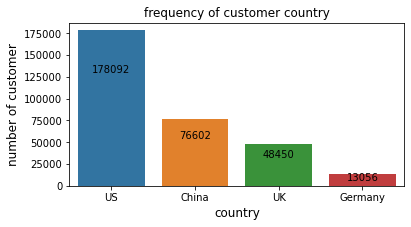

In [19]:
country_type = data['country'].value_counts()

fig, ax = plt.subplots(figsize=(6, 3))

x_axis = country_type.index.tolist()
y_axis = country_type.values.tolist()

g = sns.barplot(x = x_axis, y = y_axis)

plt.title('frequency of customer country')
plt.ylabel('number of customer', fontsize = 12)
plt.xlabel('country', fontsize = 12)
for p in g.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h*0.75)
    text = f'{h:0.0f}'
    ax.annotate(text=text, xy=xy, ha='center', va='center')

plt.show()

In [20]:
# it has the most customer in US, also has lots of customer in China
# customer in Germany is extramelly low

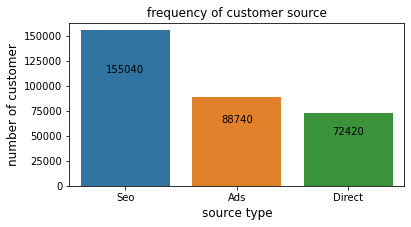

In [21]:
source_type = data['source'].value_counts()

fig, ax = plt.subplots(figsize=(6, 3))

x_axis = source_type.index.tolist()
y_axis = source_type.values.tolist()

g = sns.barplot(x = x_axis, y = y_axis)

g.set_title('frequency of customer source')
g.set_xlabel('source type', fontsize = 12)
g.set_ylabel('number of customer', fontsize = 12)

for p in g.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h*0.75)
    text = f'{h:0.0f}'
    ax.annotate(text=text, xy=xy, ha='center', va='center')

plt.show()

In [22]:
# clicking on search results is the most commen way to reach out the website

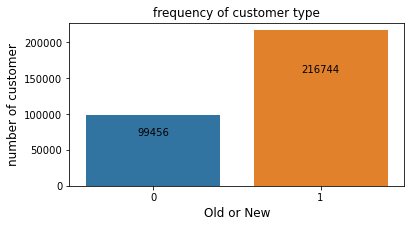

In [23]:
customer_type = data['new_user'].value_counts()

fig, ax = plt.subplots(figsize=(6, 3))

x_axis = customer_type.index.tolist()
y_axis = customer_type.values.tolist()

g = sns.barplot(x = x_axis, y = y_axis)

plt.title('frequency of customer type')
plt.ylabel('number of customer', fontsize = 12)
plt.xlabel('Old or New', fontsize = 12)
for p in g.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h*0.75)
    text = f'{h:0.0f}'
    ax.annotate(text=text, xy=xy, ha='center', va='center')

plt.show()

## 2.  Remove outliers in 'age' and 'total_pages_visited'

<AxesSubplot:xlabel='age', ylabel='Count'>

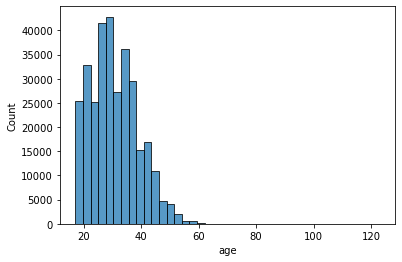

In [24]:
sns.histplot(data['age'], bins = 40)

In [25]:
older_than_80 = data[(data['age'] > 80)] 
older_than_80.shape

(2, 6)

In [26]:
older_than_60 = data[(data['age'] > 60)] 
older_than_60.shape

(237, 6)

### customer age over 80 are very rare, should be taken as outlier

<AxesSubplot:xlabel='total_pages_visited', ylabel='Count'>

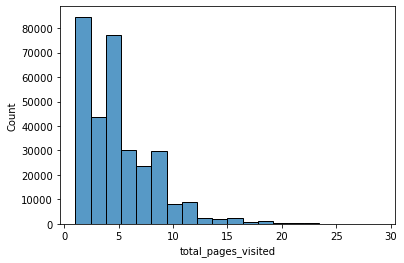

In [27]:
sns.histplot(data['total_pages_visited'], bins = 20)

### total_pages_visited over 25 are very rare, should be taken as outlier

In [28]:
page_visted_than_25 = data[(data['total_pages_visited'] > 25)] 
page_visted_than_25.shape

(27, 6)

In [29]:
page_visted_than_20 = data[(data['total_pages_visited'] > 20)] 
page_visted_than_20.shape

(701, 6)

In [30]:
data = data[(data['total_pages_visited'] <=25) & (data['age'] <=80)] 

## 3. Basic Data Visualization

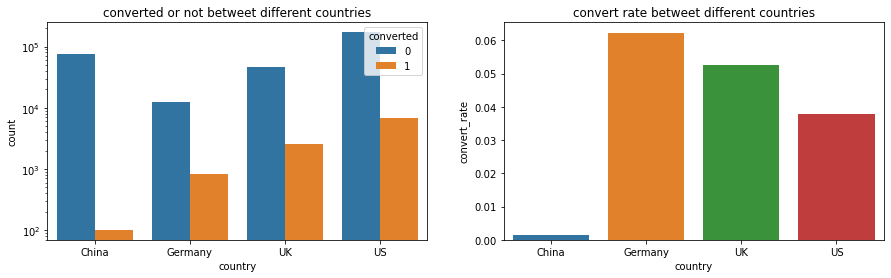

In [31]:
grouped_count = data.groupby(['country', 'converted']).size().reset_index()
grouped_count.columns = ['country', 'converted', 'count']

grouped_convert_rate = data[['country', 'converted']].groupby('country').mean().reset_index()
grouped_convert_rate.columns = ['country', 'convert_rate']

fig, ax = plt.subplots(1, 2, figsize=(15, 4), sharex = True)

sns.barplot(data = grouped_count, x ='country', hue='converted', y = 'count', ax = ax[0])
ax[0].set_yscale("log")
ax[0].set_title('converted or not between different countries')

sns.barplot(data = grouped_convert_rate, x ='country', y = 'convert_rate', ax = ax[1])
ax[1].set_title('convert rate between different countries')

plt.show()

In [32]:
# China has the lowest convert rate and the rate is looks abmormal, need more reseach
# germany has the highest convert rate but the customer size is really low

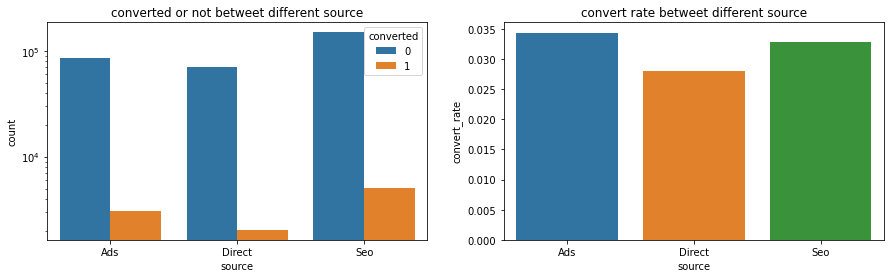

In [33]:
grouped_count = data.groupby(['source', 'converted']).size().reset_index()
grouped_count.columns = ['source', 'converted', 'count']

grouped_convert_rate = data[['source', 'converted']].groupby('source').mean().reset_index()
grouped_convert_rate.columns = ['source', 'convert_rate']

fig, ax = plt.subplots(1, 2, figsize=(15, 4), sharex = True)

sns.barplot(data = grouped_count, x ='source', hue='converted', y = 'count', ax = ax[0])
ax[0].set_yscale("log")
ax[0].set_title('converted or not between different source')

sns.barplot(data = grouped_convert_rate, x ='source', y = 'convert_rate', ax = ax[1])
ax[1].set_title('convert rate between different source')

plt.show()

In [34]:
# Ads  and Seo is more more effective in convert rate
# the difference between different sources are not large

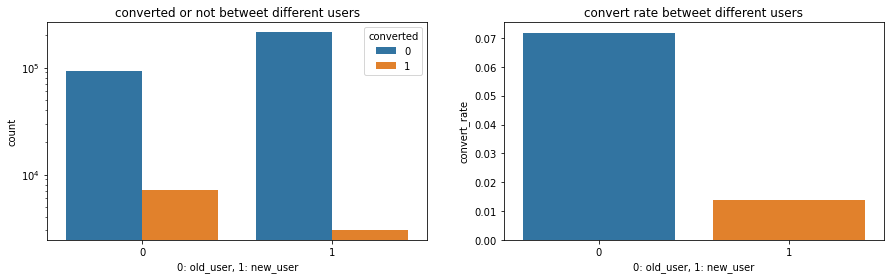

In [35]:
grouped_count = data.groupby(['new_user', 'converted']).size().reset_index()
grouped_count.columns = ['0: old_user, 1: new_user', 'converted', 'count']

grouped_convert_rate = data[['new_user', 'converted']].groupby('new_user').mean().reset_index()
grouped_convert_rate.columns = ['0: old_user, 1: new_user', 'convert_rate']

fig, ax = plt.subplots(1, 2, figsize=(15, 4), sharex = True)

sns.barplot(data = grouped_count, x ='0: old_user, 1: new_user', hue='converted', y = 'count', ax = ax[0])
ax[0].set_yscale("log")
ax[0].set_title('converted or not between different users')

sns.barplot(data = grouped_convert_rate, x ='0: old_user, 1: new_user', y = 'convert_rate', ax = ax[1])
ax[1].set_title('convert rate between different users')

plt.show()

In [36]:
# old user has an absolute high rate of convert
# the website has more new_users but their convert rate is not efficient

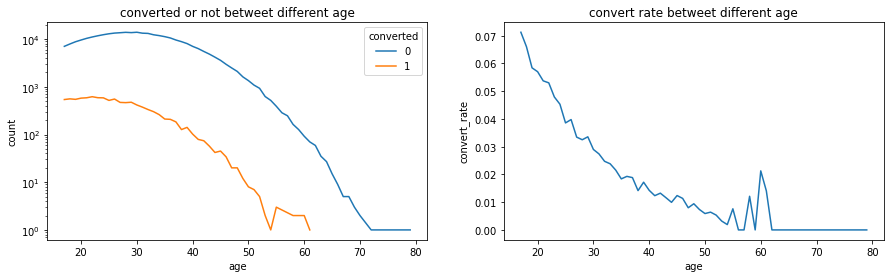

In [37]:
grouped_count = data.groupby(['age', 'converted']).size().reset_index()
grouped_count.columns = ['age', 'converted', 'count']

grouped_convert_rate = data[['age', 'converted']].groupby('age').mean().reset_index()
grouped_convert_rate.columns = ['age', 'convert_rate']

fig, ax = plt.subplots(1, 2, figsize=(15, 4), sharex = True)

sns.lineplot(data = grouped_count, x ='age', hue='converted', y = 'count', ax = ax[0])
ax[0].set_yscale("log")
ax[0].set_title('converted or not between different age')

sns.lineplot(data = grouped_convert_rate, x ='age', y = 'convert_rate', ax = ax[1])
ax[1].set_title('convert rate between different age')

plt.show()

In [38]:
# the website is more popular among young people

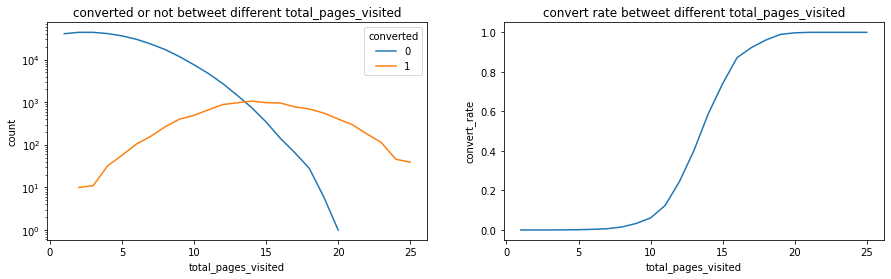

In [39]:
grouped_count = data.groupby(['total_pages_visited', 'converted']).size().reset_index()
grouped_count.columns = ['total_pages_visited', 'converted', 'count']

grouped_convert_rate = data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
grouped_convert_rate.columns = ['total_pages_visited', 'convert_rate']

fig, ax = plt.subplots(1, 2, figsize=(15, 4), sharex = True)

sns.lineplot(data = grouped_count, x ='total_pages_visited', hue='converted', y = 'count', ax = ax[0])
ax[0].set_yscale("log")
ax[0].set_title('converted or not between different total_pages_visited')

sns.lineplot(data = grouped_convert_rate, x ='total_pages_visited', y = 'convert_rate', ax = ax[1])
ax[1].set_title('convert rate between different total_pages_visited')

plt.show()

In [40]:
# the more page you visit, the more likely you will buy

## 4. Model Fitting

In [41]:
data_with_dummy = pd.get_dummies(data, columns = ['country', 'source'], drop_first = True)
data_with_dummy.head(3)

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1


In [42]:
features_with_dummy = data_with_dummy.columns[:3].tolist() + data_with_dummy.columns[4:].tolist()

X_train_with_dummy, X_test_with_dummy, y_train_with_dummy, y_test_with_dummy = train_test_split(data_with_dummy[features_with_dummy], 
                                                    data_with_dummy['converted'], 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [43]:
features= data.columns[:5].tolist()

X_train, X_test, y_train, y_test = train_test_split(data[features], 
                                                    data['converted'], 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [44]:
def plot_auc_curve(model, X, y):
    try:
        y_pred_prob = model.predict_proba(X)[:,1]
    except:
        d = model.decision_function(X)
        y_pred_prob = np.exp(d) / (1 + np.exp(d))

    auc = roc_auc_score(y, y_pred_prob)
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve\n AUC={auc}'.format(auc = auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)

### 4.1 LogisticRegression

In [45]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train_with_dummy, y_train_with_dummy)

LogisticRegression(max_iter=1000)

In [46]:
model = logreg
train_con_matrix = confusion_matrix(y_train_with_dummy, model.predict(X_train_with_dummy))
print('train matrix: \n', train_con_matrix)
print('train accuracy:', round(accuracy_score(y_train_with_dummy, model.predict(X_train_with_dummy)),4))

test_con_matrix = confusion_matrix(y_test_with_dummy, model.predict(X_test_with_dummy))
print('\n test matrix: \n', test_con_matrix)
print('test accuracy:', round(accuracy_score(y_test_with_dummy, model.predict(X_test_with_dummy)), 4))

train matrix: 
 [[243866    944]
 [  2562   5564]]
train accuracy: 0.9861

 test matrix: 
 [[60945   245]
 [  618  1427]]
test accuracy: 0.9864


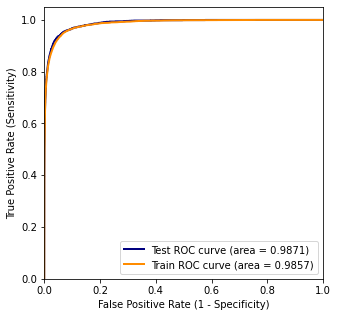

In [47]:
y_test_pred_prob = logreg.predict_proba(X_test_with_dummy)[:,1]
y_train_pred_prob = logreg.predict_proba(X_train_with_dummy)[:,1]

fpr_test, tpr_test, _ = roc_curve(y_test_with_dummy, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

fpr_train, tpr_train, _ = roc_curve(y_train_with_dummy, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=[5, 5])

plt.plot(fpr_test, tpr_test, color='navy', lw=2, label='Test ROC curve (area = %0.4f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (area = %0.4f)' % roc_auc_train)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [48]:
X = data_with_dummy[features_with_dummy]
y = data_with_dummy['converted']
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
print(cross_val_score(logreg, X, y, cv=5))

[0.98628924 0.98594111 0.98605181 0.98630484 0.98625739]


### 4.2 DecisionTreeClassifier

In [49]:
fullClassTree = DecisionTreeClassifier(random_state=1, max_depth = 5)
fullClassTree.fit(X_train_with_dummy, y_train_with_dummy)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [50]:
model = fullClassTree
train_con_matrix = confusion_matrix(y_train_with_dummy, model.predict(X_train_with_dummy))
print('train matrix: \n', train_con_matrix)
print('train accuracy:', round(accuracy_score(y_train_with_dummy, model.predict(X_train_with_dummy)),4))

test_con_matrix = confusion_matrix(y_test_with_dummy, model.predict(X_test_with_dummy))
print('\n test matrix: \n', test_con_matrix)
print('test accuracy:', round(accuracy_score(y_test_with_dummy, model.predict(X_test_with_dummy)), 4))

train matrix: 
 [[243749   1061]
 [  2686   5440]]
train accuracy: 0.9852

 test matrix: 
 [[60918   272]
 [  664  1381]]
test accuracy: 0.9852


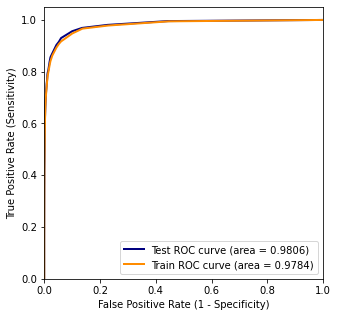

In [51]:
model = fullClassTree
y_test_pred_prob = model.predict_proba(X_test_with_dummy)[:,1]
y_train_pred_prob = model.predict_proba(X_train_with_dummy)[:,1]

fpr_test, tpr_test, _ = roc_curve(y_test_with_dummy, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

fpr_train, tpr_train, _ = roc_curve(y_train_with_dummy, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=[5, 5])

plt.plot(fpr_test, tpr_test, color='navy', lw=2, label='Test ROC curve (area = %0.4f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (area = %0.4f)' % roc_auc_train)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

### 4.3 RandomForestClassifier

##### random froest requeire very little time to optimize it, and it's strong with outliers, irrelevant variables, continuous and discrete variables

In [52]:
rf_reg = RandomForestClassifier(max_features=3)
rf_reg.fit(X_train_with_dummy, y_train_with_dummy)

RandomForestClassifier(max_features=3)

In [53]:
model = rf_reg
train_con_matrix = confusion_matrix(y_train_with_dummy, model.predict(X_train_with_dummy))
print('train matrix: \n', train_con_matrix)
print('train accuracy:', round(accuracy_score(y_train_with_dummy, model.predict(X_train_with_dummy)),4))

test_con_matrix = confusion_matrix(y_test_with_dummy, model.predict(X_test_with_dummy))
print('\n test matrix: \n', test_con_matrix)
print('test accuracy:', round(accuracy_score(y_test_with_dummy, model.predict(X_test_with_dummy)), 4))

train matrix: 
 [[244011    799]
 [  2210   5916]]
train accuracy: 0.9881

 test matrix: 
 [[60882   308]
 [  635  1410]]
test accuracy: 0.9851


###### Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.



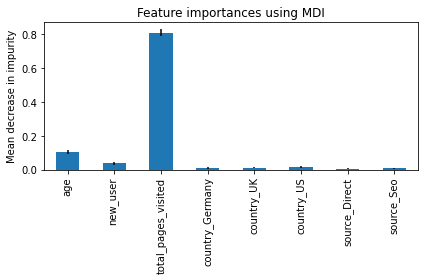

In [54]:
import time
rf_reg_importances = pd.Series(rf_reg.feature_importances_, index=features_with_dummy)
std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
elapsed_time = time.time()

fig, ax = plt.subplots()
rf_reg_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

##### Total pages visited is the most important one, by far. Unfortunately, it is probably the least “actionable”. People visit many pages cause they already want to buy. Also, in order to buy you have to click on multiple pages.


In [55]:
#### we can fit a model without the feature of page visited

In [56]:
features_with_dummy_modify = data_with_dummy.columns[:2].tolist() + data_with_dummy.columns[4:].tolist()

In [57]:
rf_reg_modify = RandomForestClassifier(max_features=3)
X_train_with_dummy_modify =  X_train_with_dummy[features_with_dummy_modify]
rf_reg_modify.fit(X_train_with_dummy_modify, y_train_with_dummy)

RandomForestClassifier(max_features=3)

In [58]:
X_test_with_dummy_modify =  X_test_with_dummy[features_with_dummy_modify]

In [59]:
model = rf_reg_modify
train_con_matrix = confusion_matrix(y_train_with_dummy, model.predict(X_train_with_dummy_modify))
print('train matrix: \n', train_con_matrix)
print('train accuracy:', round(accuracy_score(y_train_with_dummy, model.predict(X_train_with_dummy_modify)),4))

test_con_matrix = confusion_matrix(y_test_with_dummy, model.predict(X_test_with_dummy_modify))
print('\n test matrix: \n', test_con_matrix)
print('test accuracy:', round(accuracy_score(y_test_with_dummy, model.predict(X_test_with_dummy_modify)), 4))

train matrix: 
 [[244810      0]
 [  8126      0]]
train accuracy: 0.9679

 test matrix: 
 [[61190     0]
 [ 2045     0]]
test accuracy: 0.9677


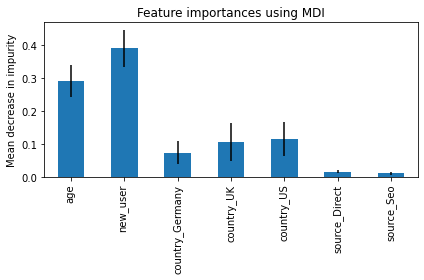

In [60]:
rf_reg_importances = pd.Series(rf_reg_modify.feature_importances_, index=features_with_dummy_modify)
std = np.std([tree.feature_importances_ for tree in rf_reg_modify.estimators_], axis=0)
elapsed_time = time.time()

fig, ax = plt.subplots()
rf_reg_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [61]:
# therefore new_user is another most important feature except pages.
# source is not important at all

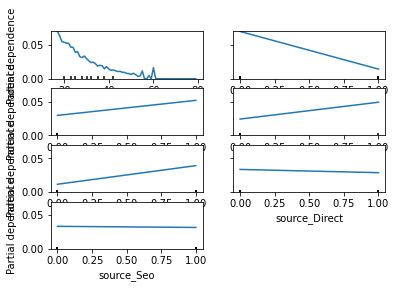

In [67]:
PartialDependenceDisplay.from_estimator(rf_reg_modify, X_train_with_dummy_modify, features_with_dummy_modify, n_cols=2)

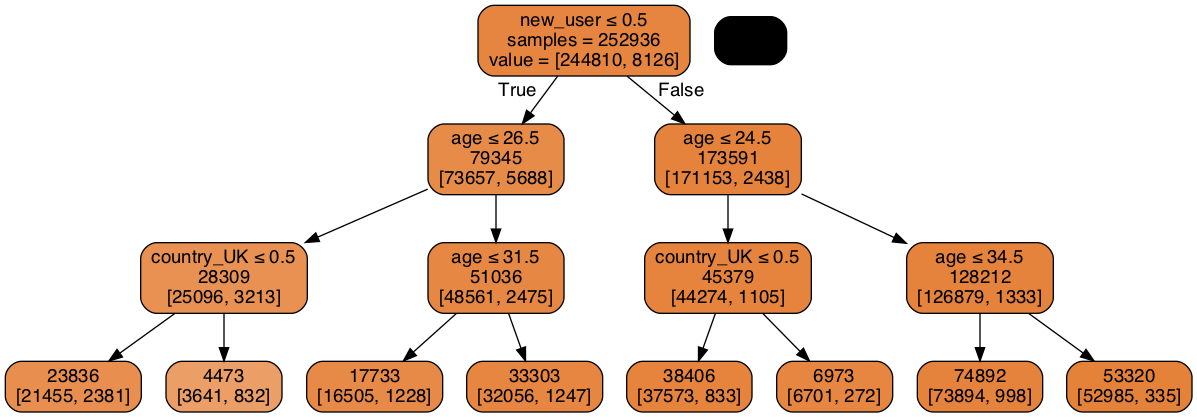

In [66]:
from dmba import plotDecisionTree

three_level_Tree = DecisionTreeClassifier(random_state=1, max_depth = 3)
three_level_Tree.fit(X_train_with_dummy_modify, y_train_with_dummy)
plotDecisionTree(three_level_Tree, feature_names = X_train_with_dummy_modify.columns)

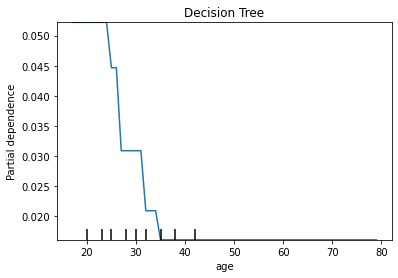

In [70]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(three_level_Tree, X_train_with_dummy_modify, ["age"], ax=ax)

In [63]:
# model = rf_reg
# y_test_pred_prob = model.predict_proba(X_test)[:,1]
# y_train_pred_prob = model.predict_proba(X_train)[:,1]

# fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
# roc_auc_test = auc(fpr_test, tpr_test)

# fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
# roc_auc_train = auc(fpr_train, tpr_train)

# plt.figure(figsize=[5, 5])

# plt.plot(fpr_test, tpr_test, color='navy', lw=2, label='Test ROC curve (area = %0.4f)' % roc_auc_test)
# plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (area = %0.4f)' % roc_auc_train)

# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (1 - Specificity)')
# plt.ylabel('True Positive Rate (Sensitivity)')
# plt.legend(loc="lower right")

# plt.show()

/Users/ChunyanHao/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- country
- source
Feature names seen at fit time, yet now missing:
- country_Germany
- country_UK
- country_US
- source_Direct
- source_Seo

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'US'